# Variable Analysis

In [1]:
import pandas as pd
import seaborn as sns
import re

C:\Users\Leslie\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
titanic = pd.read_csv('../Data/train.csv')
titanic.set_index('PassengerId', inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(titanic['Survived'].value_counts().sort_index())
print(titanic['SibSp'].value_counts().sort_index())
print(titanic['Parch'].value_counts().sort_index())
print(titanic['Embarked'].value_counts().sort_index())
titanic.corr()

0    549
1    342
Name: Survived, dtype: int64
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64
C    168
Q     77
S    644
Name: Embarked, dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Looking at Pclass:

In [4]:
pclassCounts = titanic['Pclass'].value_counts().sort_index()
pclassCounts

1    216
2    184
3    491
Name: Pclass, dtype: int64

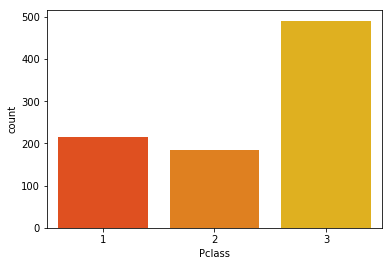

In [5]:
sns.countplot(x='Pclass', data=titanic, palette='autumn')

In [6]:
titanic.groupby(['Pclass', 'Survived']).size().reset_index(name='counts')

,Pclass,Survived,counts
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


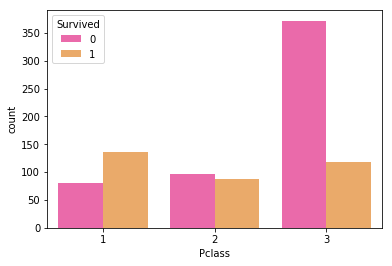

In [7]:
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='spring')

In [8]:
titanic[(titanic['Survived'] == 1)]['Pclass'].value_counts()/titanic['Pclass'].value_counts()

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

### Looking at sex

In [9]:
titanic['Sex'].value_counts().sort_index()

female    314
male      577
Name: Sex, dtype: int64

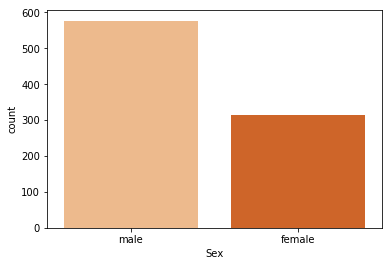

In [10]:
sns.countplot(x='Sex', data=titanic, palette='Oranges')

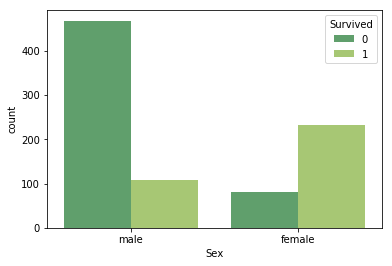

In [22]:
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='summer')

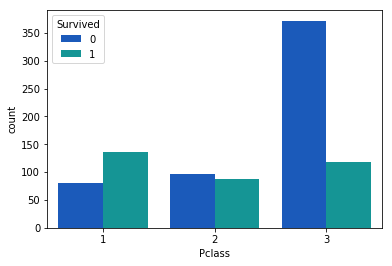

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='winter')

In [13]:
titanic[(titanic['Survived'] == 1)]['Sex'].value_counts()/titanic['Sex'].value_counts()

female    0.742038
male      0.188908
Name: Sex, dtype: float64

### Looking at Age

In [14]:
ageSeries = titanic['Age'].copy()
print(ageSeries.isna().sum(), ageSeries.count())
ageSeries.dropna(inplace=True)

177 714


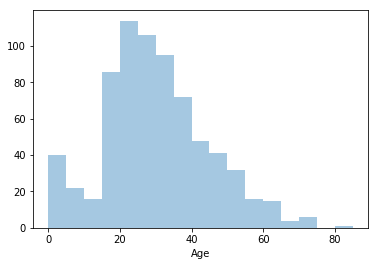

In [15]:
sns.distplot(ageSeries, kde=False, bins=range(0,90,5))

In [16]:
surAges = pd.DataFrame(ageSeries)
surAges['Survived'] = titanic['Survived']
surAges['Age Range'] = pd.cut(surAges['Age'], bins=range(0,90,10), 
                              labels=['{} to {}'.format(i+1, i+10) for i in range(0, 80, 10)])
surAges.head()

,Age,Survived,Age Range
PassengerId,,,
1,22.0,0,21 to 30
2,38.0,1,31 to 40
3,26.0,1,21 to 30
4,35.0,1,31 to 40
5,35.0,0,31 to 40


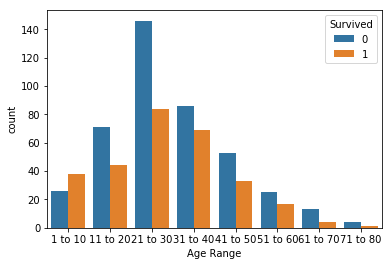

In [17]:
sns.countplot(x='Age Range', hue='Survived', data=surAges)

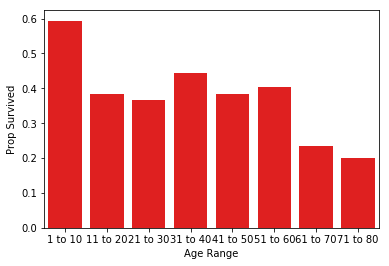

In [18]:
survived = surAges.groupby(['Age Range']).sum()['Survived']
total = surAges.groupby(['Age Range']).count()['Age']
survivedProp = pd.DataFrame(survived / total, columns=['Prop Survived'])
sns.barplot(x=survivedProp.index, y='Prop Survived', data=survivedProp, color='red')